<a href="https://colab.research.google.com/github/brindha-it21/streamlit-example/blob/crack_detection/concrete_cracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import os 
from PIL import Image

In [ ]:
os.listdir("/content/drive/MyDrive/concrete crack")

['valid', 'test', 'train', 'predict']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

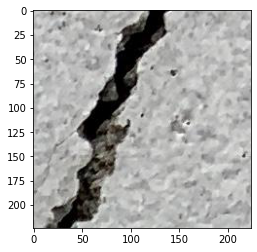

In [ ]:
im = image.imread("/content/drive/MyDrive/concrete crack/train/Positive/IMG_0482_1_15.jpg")
im.shape

plt.imshow(im)

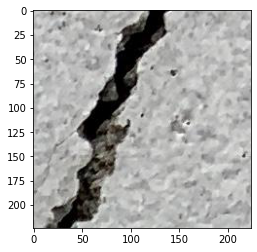

In [ ]:
plt.imshow(im)

In [ ]:
im = image.imread('/content/drive/MyDrive/concrete crack/train/Negative/IMG_2177_12_11.jpg')
im.shape

(224, 224, 3)

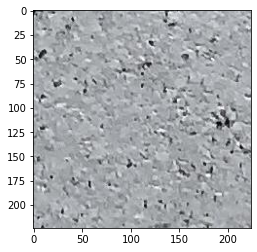

In [ ]:
plt.imshow(im)

In [ ]:
im = image.imread('/content/drive/MyDrive/concrete crack/valid/Positive/IMG_0580_11_11.jpg')
im.shape

(224, 224, 3)

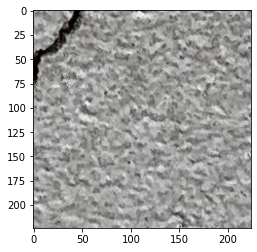

In [ ]:
plt.imshow(im)

In [ ]:
im = image.imread('/content/drive/MyDrive/concrete crack/valid/Negative/IMG_0121_11_15.jpg')
im.shape

(224, 224, 3)

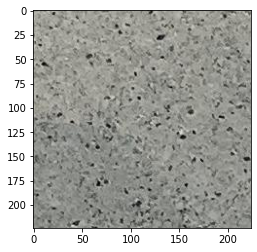

In [ ]:
plt.imshow(im)

In [ ]:
import numpy as np
from PIL import Image
def Load_Images(impath):
    imgs=[]
    label=[]
    l1=os.listdir(impath)
    for i in l1:
        l2 = os.listdir(impath + '/' + i)
        for j in l2:
            img = Image.open(impath + '/' + i + '/' + j)
            img = img.resize(size = (64, 64))
            img = img.convert('RGB')
            img = np.array(img, dtype = np.float16) / 255
            imgs.append(np.array(img)) 
            label.append(i)
            del img
    return np.array(imgs),label

In [ ]:
x, y = Load_Images('/content/drive/MyDrive/concrete crack/train')

In [ ]:
x.shape, len(y)

((600, 64, 64, 3), 600)

In [ ]:
a = pd.Series(y, dtype = "category")
a

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
595    Negative
596    Negative
597    Negative
598    Negative
599    Negative
Length: 600, dtype: category
Categories (2, object): ['Negative', 'Positive']

In [ ]:
a.value_counts()

Negative    300
Positive    300
dtype: int64

In [ ]:
b = a.cat.codes
b

0      1
1      1
2      1
3      1
4      1
      ..
595    0
596    0
597    0
598    0
599    0
Length: 600, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, b, random_state = 1, test_size = 0.2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((480, 64, 64, 3), (120, 64, 64, 3), (480,), (120,))

In [ ]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = "relu",  input_shape = x_train.shape[1:]))
model.add(AveragePooling2D())
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(AveragePooling2D())
model.add(Conv2D(128, kernel_size = (3,3), activation = "relu"))
model.add(AveragePooling2D())
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 6, 6, 128)        0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
15/15 [==============================] - 4s 208ms/step - loss: 0.8038 - accuracy: 0.4583
Epoch 2/20
15/15 [==============================] - 3s 195ms/step - loss: 0.7031 - accuracy: 0.5146
Epoch 3/20
15/15 [==============================] - 3s 193ms/step - loss: 0.7079 - accuracy: 0.4854
Epoch 4/20
15/15 [==============================] - 3s 192ms/step - loss: 0.6959 - accuracy: 0.5521
Epoch 5/20
15/15 [==============================] - 3s 193ms/step - loss: 0.6573 - accuracy: 0.6375
Epoch 6/20
15/15 [==============================] - 5s 353ms/step - loss: 0.5550 - accuracy: 0.7354
Epoch 7/20
15/15 [==============================] - 5s 327ms/step - loss: 0.5580 - accuracy: 0.6979
Epoch 8/20
15/15 [==============================] - 3s 194ms/step - loss: 0.4753 - accuracy: 0.7875
Epoch 9/20
15/15 [==============================] - 3s 194ms/step - loss: 0.4216 - accuracy: 0.8208
Epoch 10/20
15/15 [==============================] - 3s 193ms/step - loss: 0.4011 - accuracy: 0.8208

In [ ]:
model.evaluate(x_train, y_train)

15/15 [==============================] - 1s 66ms/step - loss: 0.2926 - accuracy: 0.8813


[0.29261645674705505, 0.8812500238418579]

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 55ms/step - loss: 0.4379 - accuracy: 0.7833


[0.43792667984962463, 0.7833333611488342]